# **Importing necessary libraries**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **EDA and Data Cleaning**

In [2]:
df = pd.read_csv('/content/customer_booking.csv', encoding="ISO-8859-1" )
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [11]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [12]:
df['route'].nunique()

799

In [14]:
df['booking_origin'].nunique()

104

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
          }

In [8]:
df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [15]:
# Perform one-hot encoding on categorical columns
categorical_columns = ['sales_channel', 'trip_type']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  # drop_first=True to avoid multicollinearity

In [16]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1


# **MODELLING**

In [24]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1


In [26]:
df1 = df.drop(columns=['route','booking_origin'])

In [27]:
# Split the dataset into features (X) and target (y)
X = df1.drop(columns=['booking_complete'])  # Features
y = df1['booking_complete']  # Target

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
39087,1,15,5,13,7,0,0,1,6.62,1,0,1
30893,1,298,4,9,1,1,0,0,8.83,0,0,1
45278,2,200,6,5,3,1,0,0,6.62,0,0,1
16398,1,79,21,11,6,1,0,0,8.58,0,0,1
13653,1,105,20,6,7,1,0,1,6.62,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,20,91,11,5,1,0,1,8.58,0,0,1
44732,1,65,6,18,3,1,1,1,7.42,0,0,1
38158,2,107,5,6,2,1,0,0,7.57,1,0,1
860,4,232,19,8,2,0,0,0,8.83,0,0,1


In [31]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Make predictions on the validation data
predictions = rf_classifier.predict(X_test)

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8491


# **Feature Importance**

In [34]:
# Obtain feature importance scores
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

                  Feature  Importance
1           purchase_lead    0.290022
3             flight_hour    0.194114
2          length_of_stay    0.164344
8         flight_duration    0.120247
4              flight_day    0.113941
0          num_passengers    0.055542
7   wants_in_flight_meals    0.022572
6    wants_preferred_seat    0.014445
5     wants_extra_baggage    0.012275
9    sales_channel_Mobile    0.010079
11    trip_type_RoundTrip    0.001487
10       trip_type_OneWay    0.000931


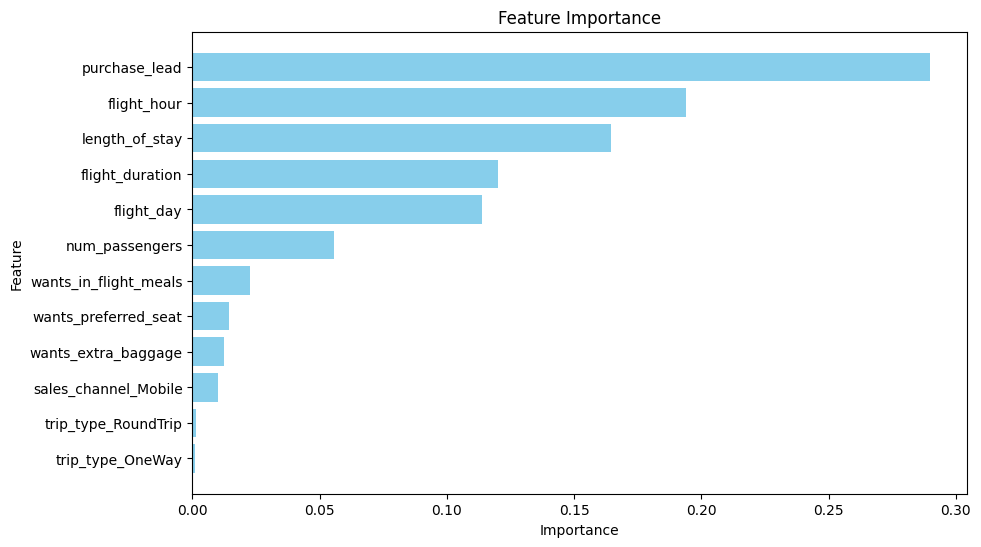

In [37]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()